In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
! pip install pandas

In [ ]:
!ls /content

Data_Train.xlsx  sample_data


In [ ]:
import pandas as pd

In [ ]:
# Read the Excel file
excel_file_path = '/content/Data_Train.xlsx'
data = pd.read_excel(excel_file_path)

# Convert to CSV and save
csv_file_path = '/content/Data_Train.csv'
data.to_csv(csv_file_path, index=False)

print(f"Excel file has been converted to CSV and saved at {csv_file_path}")

Excel file has been converted to CSV and saved at /content/Data_Train.csv


In [ ]:
flight_data = pd.read_csv('/content/Data_Train.csv')

In [ ]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
pd.read_csv('/content/Data_Train.csv',header=0)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:

pd.read_csv('/content/Data_Train.csv',parse_dates=['Date_of_Journey']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


<ipython-input-13-fa40ccd8f10c>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.read_csv('/content/Data_Train.csv',parse_dates=['Date_of_Journey']).info()


In [ ]:
flight_data.shape

(10683, 11)

In [ ]:
flight_data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
360,Jet Airways,9/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
8339,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,13:15 13 Mar,18h 20m,1 stop,In-flight meal not included,11087
4744,Multiple carriers,1/06/2019,Delhi,Cochin,DEL → BOM → COK,06:40,19:00,12h 20m,1 stop,No info,11200
8488,IndiGo,27/03/2019,Delhi,Cochin,DEL → BBI → COK,02:35,08:30,5h 55m,1 stop,No info,7731
5943,Multiple carriers,24/06/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,In-flight meal not included,7268


In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
flight_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
flight_data.duplicated().sum()

220

In [ ]:
import seaborn as sns

# categorical data
# countplot

<Axes: xlabel='Airline', ylabel='count'>

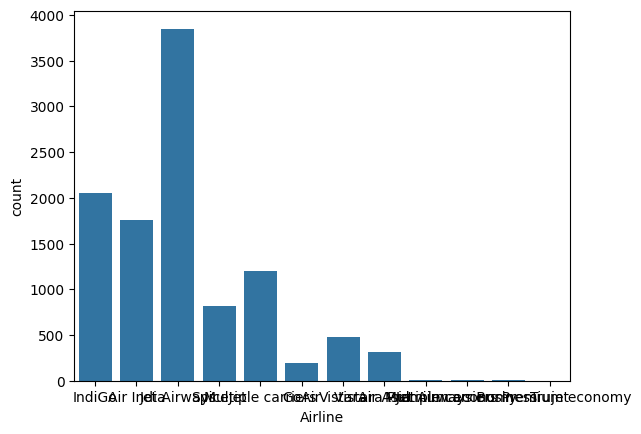

In [ ]:
sns.countplot(x='Airline',data=flight_data)

<Axes: xlabel='Source', ylabel='count'>

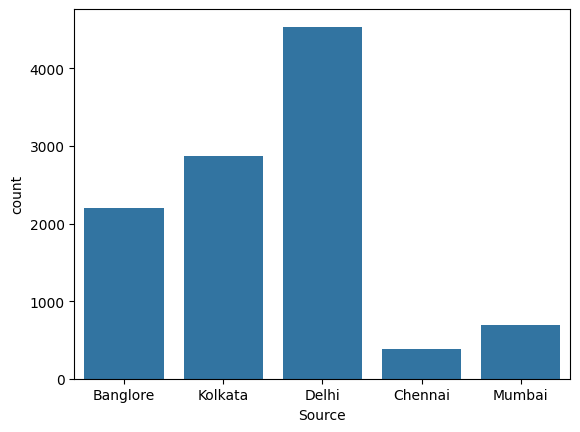

In [ ]:
sns.countplot(x='Source',data=flight_data)

<Axes: xlabel='Total_Stops', ylabel='count'>

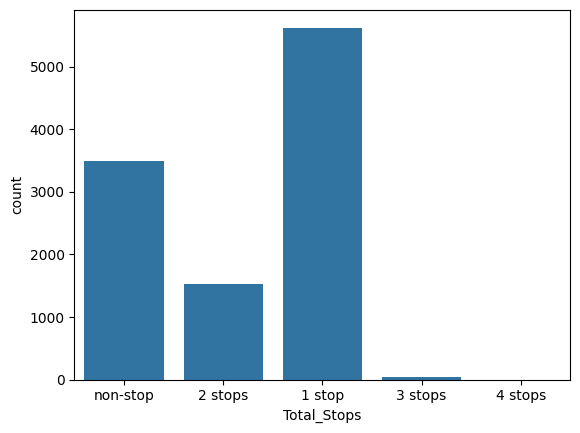

In [ ]:
sns.countplot(x='Total_Stops',data=flight_data)

<Axes: ylabel='count'>

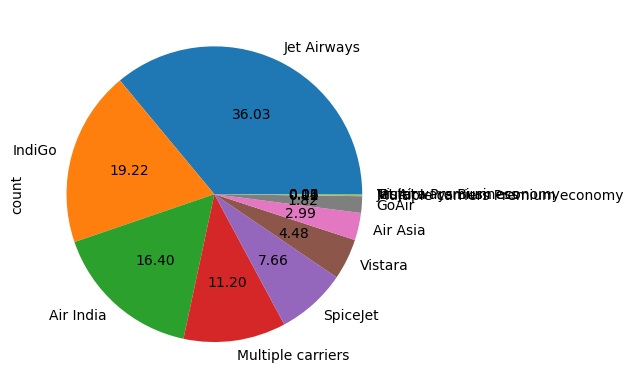

In [ ]:
flight_data['Airline'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

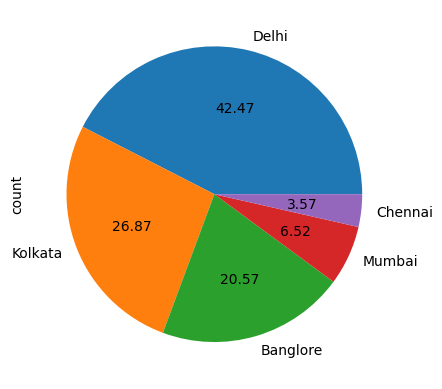

In [ ]:
flight_data['Source'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

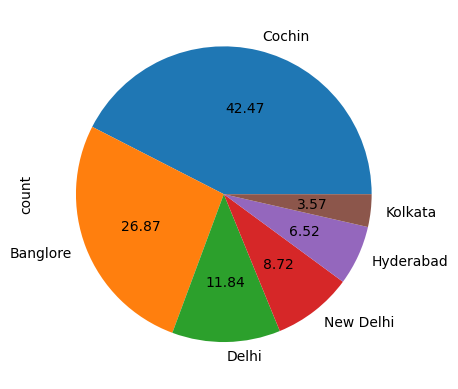

In [ ]:
flight_data['Destination'].value_counts().plot(kind='pie',autopct='%.2f')

# boxplot

<Axes: ylabel='Price'>

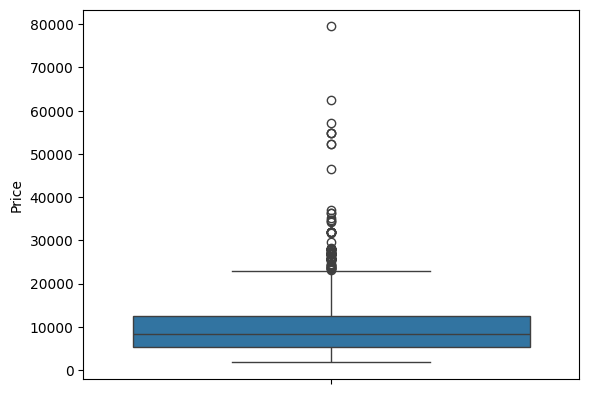

In [ ]:
sns.boxplot(flight_data['Price'])

In [ ]:
flight_data['Price'].min()

1759

In [ ]:
flight_data['Price'].max()

79512

In [ ]:
flight_data['Price'].skew()

1.8125523782189141

<Axes: xlabel='Route', ylabel='Price'>

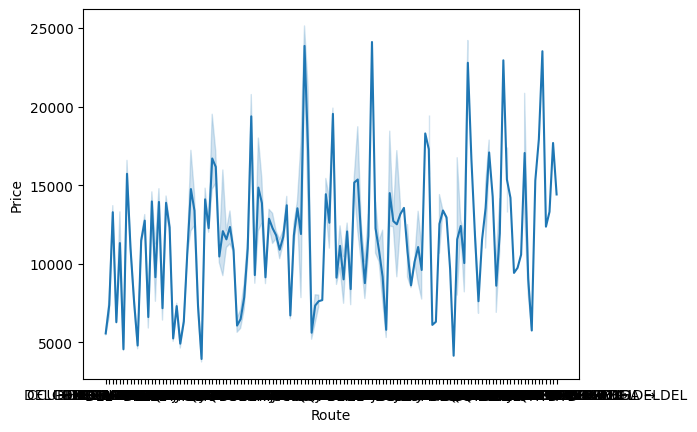

In [ ]:
sns.lineplot(x=flight_data['Route'],y=flight_data['Price'])

In [ ]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b3528e5813fcf5570deea9ca6b45d84cfe3977c49c317b3c9ebe53a278cd8a92
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport
prof = ProfileReport(flight_data)
prof.to_file(output_file='output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
airlines = flight_data.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


In [ ]:
days_df = flight_data[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [ ]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


In [ ]:

flight_data["Journey_date"]=flight_data["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_data["Journey_month"]=flight_data["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_data["Journey_year"]=flight_data["Date_of_Journey"].str.split("/").str[2].astype(int)

In [ ]:
flight_data=flight_data.drop(["Date_of_Journey"],axis=1)

In [ ]:
flight_data=flight_data.drop(["Journey_year"],axis=1)
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:

flight_data["Total_Stops"]=flight_data["Total_Stops"].str.split(" ").str[0]
flight_data["Total_Stops"]=flight_data["Total_Stops"].replace("non-stop","0")
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [ ]:
flight_data["Arrival_Time"]=flight_data["Arrival_Time"].str.split(" ").str[0]
flight_data['Arrival_hour']=flight_data["Arrival_Time"].str.split(':').str[0].astype(int)
flight_data['Arrival_min']=flight_data["Arrival_Time"].str.split(':').str[1].astype(int)
flight_data=flight_data.drop(["Arrival_Time"],axis=1)
# Dep_Time
flight_data['Dep_hour']=flight_data["Dep_Time"].str.split(':').str[0].astype(int)
flight_data['Dep_min']=flight_data["Dep_Time"].str.split(':').str[1].astype(int)
flight_data=flight_data.drop(["Dep_Time"],axis=1)

flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,21,35,16,50


In [ ]:
flight_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
flight_data["Duration_hr"]=flight_data["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [ ]:
# Create 'Duration_min' column before filling NA values
flight_data["Duration_min"]=flight_data["Duration"].str.split(' ').str[1].str.split('m').str[0]
flight_data['Duration_min'].fillna("0",inplace=True) # Now fill the NA values
flight_data['Duration_hr'].str.contains('h').sum()

0

In [ ]:
flight_data['Duration_hr'].str.contains('m').sum()

1

In [ ]:
# Create 'Duration_min' column before filling NA values
flight_data["Duration_min"]=flight_data["Duration"].str.split(' ').str[1].str.split('m').str[0]
flight_data['Duration_min'].fillna("0",inplace=True) # Now fill the NA values
flight_data['Duration_hr'].str.contains('h').sum()

0

In [ ]:
flight_data[flight_data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327,6,3,16,55,16,50,5m,0


In [ ]:
flight_data.loc[[6474, 2660], 'Duration_min'] = flight_data.loc[[6474, 2660], 'Duration_hr']
flight_data.loc[flight_data['Duration_min'] == '5m', 'Duration_min'] = 5

In [ ]:
flight_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [ ]:
flight_data['Duration_hr'].str.contains('m').sum()

1

In [ ]:
# Fix the 'Duration_hr' values for rows that were previously in minutes
flight_data.loc[[6474, 2660], 'Duration_hr'] = 0  # Assuming these were short flights, less than an hour

# Now convert the column to integers
flight_data["Duration_hr"] = flight_data["Duration_hr"].astype(int)

In [ ]:

flight_data["Duration_min"] = flight_data["Duration_min"].astype(int)

In [ ]:
flight_data["Duration"] = (flight_data["Duration_hr"]*60) + flight_data["Duration_min"]
flight_data=flight_data.drop(['Duration_hr','Duration_min'],axis=1)
flight_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50


In [ ]:
flight_data.head(6475)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,725,1,9845,21,3,21,0,8,55
6471,IndiGo,Banglore,Delhi,165,0,4077,1,5,4,15,1,30
6472,Multiple carriers,Delhi,Cochin,690,1,9315,21,5,19,0,7,30
6473,Jet Airways,Kolkata,Banglore,570,1,14781,9,5,23,35,14,5


In [ ]:
flight_data["Price"].fillna(flight_data["Price"].mean(),inplace=True)

In [ ]:
flight_data["Total_Stops"].value_counts()

,count
Total_Stops,
1,5625
0,3491
2,1520
3,45
4,1


In [ ]:
flight_data["Total_Stops"]=flight_data["Total_Stops"].fillna('1')

In [ ]:
flight_data["Total_Stops"]=flight_data["Total_Stops"].astype(int)
flight_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,0
Price,0
Journey_date,0
Journey_month,0
Arrival_hour,0
Arrival_min,0


In [ ]:
flight_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,0
Price,0
Journey_date,0
Journey_month,0
Arrival_hour,0
Arrival_min,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_data[i]=la.fit_transform(flight_data[i])
flight_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897,24,3,1,10,22,20
1,1,3,0,445,2,7662,1,5,13,15,5,50
2,4,2,1,1140,2,13882,9,6,4,25,9,25
3,3,3,0,325,1,6218,12,5,23,30,18,5
4,3,0,5,285,1,13302,1,3,21,35,16,50


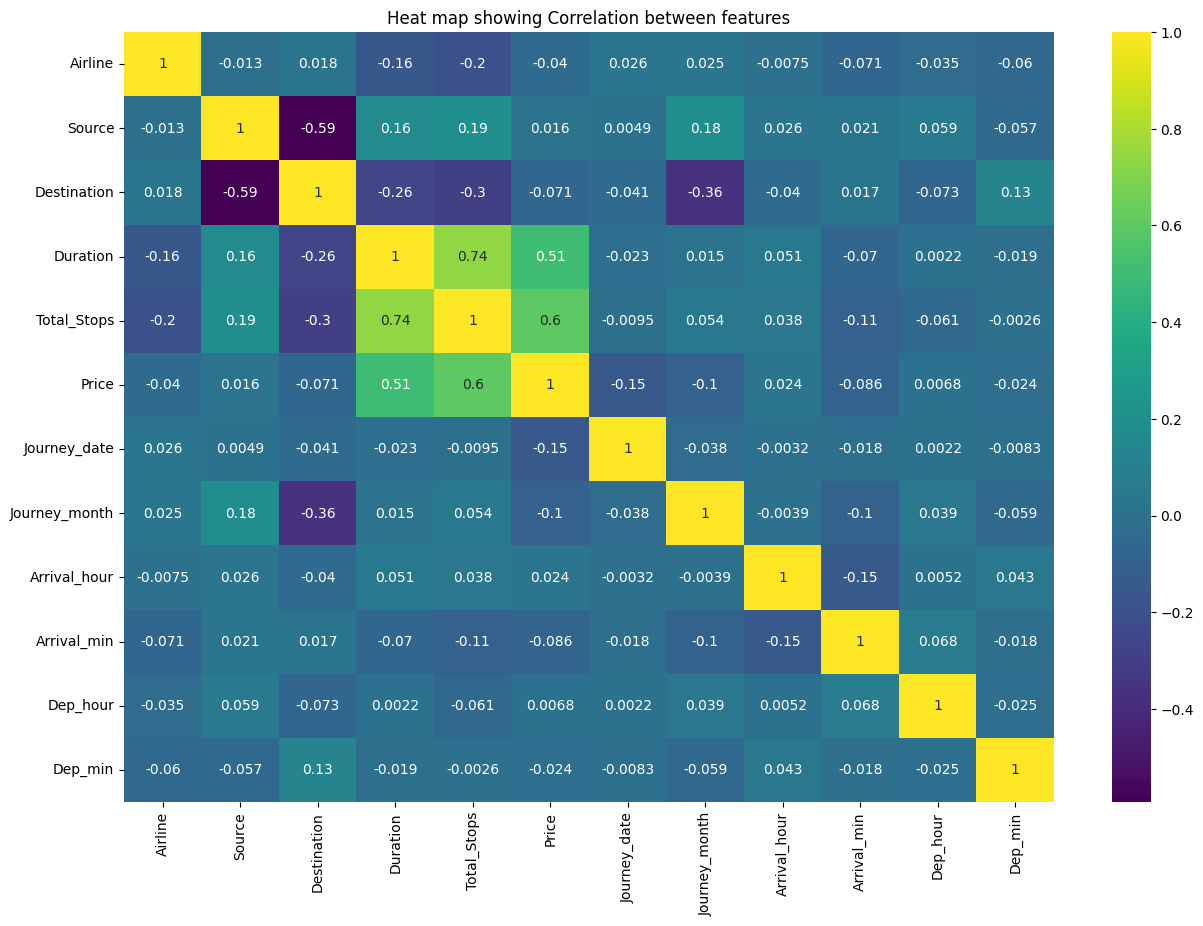

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(flight_data.corr(),annot=True,cmap='viridis')
plt.title("Heat map showing Correlation between features")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flight_data.drop('Price', axis=1),
                                                    flight_data['Price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((7478, 11), (3205, 11))

In [ ]:
train_df=flight_data[0:10683]
test_df=flight_data[10683:]

In [ ]:
test_df.tail()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min


In [ ]:
train_df.tail()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
10678,0,3,0,150,0,4107,9,4,22,25,19,55
10679,1,3,0,155,0,4145,27,4,23,20,20,45
10680,4,0,2,180,0,7229,27,4,11,20,8,20
10681,10,0,5,160,0,12648,1,3,14,10,11,30
10682,1,2,1,500,2,11753,9,5,19,15,10,55


In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
#function to train the models
def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [ ]:

knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are: [ 8399.4  3843.4 10933.  ... 10991.   9872.4  5617.4]


r2 score : 0.5711030439721501
MAE: 1825.5729797191889
MSE: 8687929.978071764


In [ ]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are: [ 7048.  3311. 11201. ... 11789.  8586.  8040.]


r2 score : 0.6529132852793058
MAE: 1395.2439833593344
MSE: 7030744.87107471


In [ ]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are: [ 6871.5         3814.23342857 11513.72       ... 11703.52
  9121.395       7090.055     ]


r2 score : 0.8067132207841317
MAE: 1186.245489727944
MSE: 3915304.0839148327


In [ ]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'],
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,57.110304
1,Decision Tree,65.291329
2,Random Forest,80.671322


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [ ]:
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
pred=rf_model.predict(X_test)
r2_score(y_test,pred)

0.8094326776737024

In [ ]:

print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8094326776737024
MAE: 1242.0494131155745
MSE: 3860217.5399258337
RMSE: 1964.7436321123002


In [ ]:
!pip install category-encoders
import category_encoders as ce
import xgboost as xgb


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 4176209.83


In [ ]:
print(y_pred)

[ 5308.982   3707.8135 11796.36   ... 10313.282  10612.128   6011.138 ]


In [ ]:
r2_score(y_test,y_pred)

0.7938330891055213

In [ ]:
pred=rf_model.predict(X_test)
r2_score(y_test,pred)